## Titanic Dataset Analysis

### Set Up

In [32]:
# %pip install jupyter pandas numpy seaborn scikit-learn

In [53]:
from functions import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from warnings import filterwarnings

filterwarnings('ignore')

### Data Pre-Processing and Wrangling

In [34]:
# read the csvs containing the train data, X_test, y_test
train_df = pd.read_csv("data/train.csv")
X_test = pd.read_csv("data/test.csv")
y_test = pd.read_csv("data/gender_submission.csv")

In [35]:
# split the train dataset into X_train and y_train and also drop useless variables such as name and ticket id
X_test.drop(columns="Ticket", axis=1, inplace=True)
X_train = train_df.drop(columns=["Ticket", "Survived"], axis=1)
y_train = train_df[["PassengerId", "Survived"]]

In [36]:
## drop all the rows where there are NaN values (except the cabin column class as there are too many NaN in it)
keep_column = "Cabin"
X_train = X_train.dropna(subset=[col for col in X_train.columns if col != keep_column])
X_test = X_test.dropna(subset=[col for col in X_test.columns if col != keep_column])

In [37]:
# change the embarked loction code to name
locations = {"C": "Cherbourg", "S": "Southampton", "Q": "Queenstown"}
X_train["Embarked"] = X_train["Embarked"].map(locations)
X_test["Embarked"] = X_test["Embarked"].map(locations)

X_train["Sex"] = X_train["Sex"].str.capitalize()
X_test["Sex"] = X_test["Sex"].str.capitalize()

### Feature Engineering

In [38]:
# call the feature generation function to generate the following features
# family_size, title, age group and cabin class
X_train = generate_features(X_train)
X_test = generate_features(X_test)

# then drop the name column as it is no longer needed as all the names will be unique
X_train.drop("Name", axis=1, inplace=True)
X_test.drop("Name", axis=1, inplace=True)

In [39]:
# sanity check to make sure both df have the correct columns
assert all(X_train.columns == X_test.columns)

### Exploratory Data Analysis

In [101]:
cmap = "mako"
mako = sns.color_palette(cmap, as_cmap=True)

In [41]:
X_train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family Size,Title,Age Group
0,1,3,Male,22.0,1,0,7.2500,U,Southampton,2,Mister,Adult
1,2,1,Female,38.0,1,0,71.2833,U,Cherbourg,2,Misses,Adult
2,3,3,Female,26.0,0,0,7.9250,U,Southampton,1,Miss,Adult
3,4,1,Female,35.0,1,0,53.1000,U,Southampton,2,Misses,Adult
4,5,3,Male,35.0,0,0,8.0500,U,Southampton,1,Mister,Adult


##### Univariate Analysis

(0.0, 600.0)

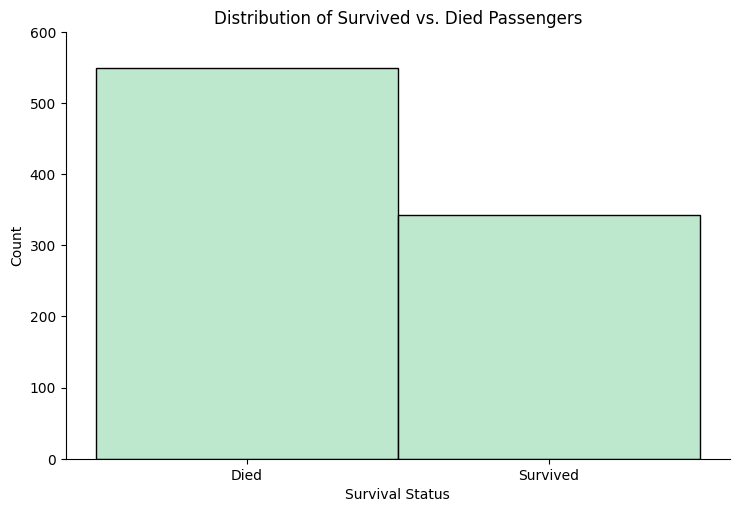

In [95]:
sns.displot(data=y_train,
            x="Survived",
            kind="hist",
            color=mako(0.9),
            aspect=1.5,
            bins=[-0.5, 0.5, 1.5])\
                .set(xticks=[0,1])\
                .set_xticklabels(["Died", "Survived"])\
                .set_axis_labels("Survival Status", "Count")

plt.title("Distribution of Survived vs. Died Passengers")
plt.ylim(0,600)

(0.0, 400.0)

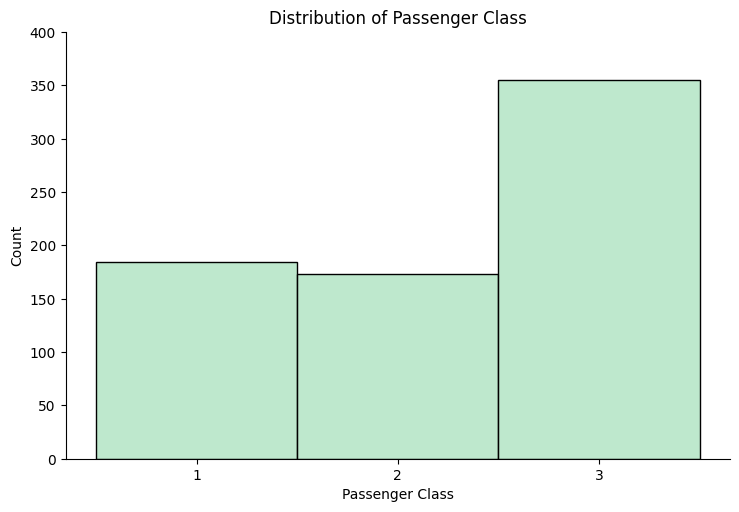

In [103]:
sns.displot(data=X_train,
            x="Pclass",
            kind="hist",
            color=mako(0.9),
            aspect=1.5,
            bins=[0.5, 1.5, 2.5, 3.5])\
                .set(xticks=[1,2,3])\
                .set_axis_labels("Passenger Class", "Count")
plt.title("Distribution of Passenger Class")
plt.ylim(0,400)

(0.0, 600.0)

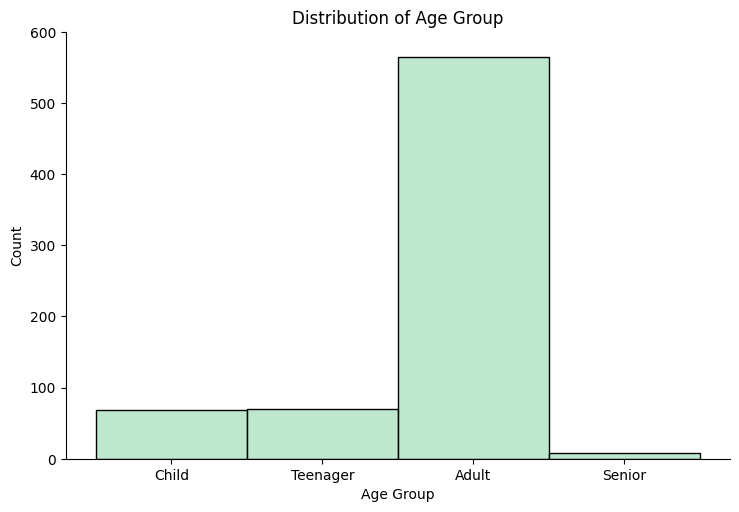

In [109]:
sns.displot(data=X_train,
            x="Age Group",
            kind="hist",
            color=mako(0.9),
            aspect=1.5,
            bins=[0.5, 1.5, 2.5, 3.5, 4.5])\
                .set(xticks=[0,1,2,3])\
                .set_axis_labels("Age Group", "Count")
plt.title("Distribution of Age Group")
plt.ylim(0,600)

(0.0, 600.0)

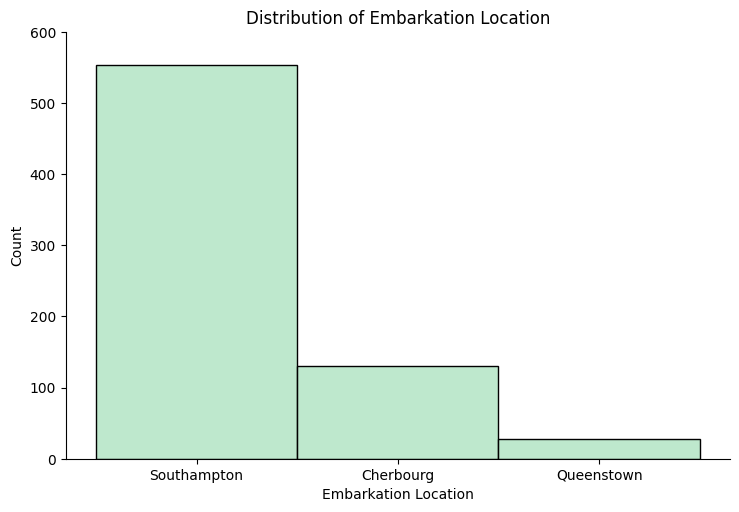

In [111]:
sns.displot(data=X_train,
            x="Embarked",
            kind="hist",
            color=mako(0.9),
            aspect=1.5,
            bins=[0.5, 1.5, 2.5, 3.5])\
                .set(xticks=[0,1,2])\
                .set_axis_labels("Embarkation Location", "Count")
plt.title("Distribution of Embarkation Location")
plt.ylim(0,600)

(0.0, 400.0)

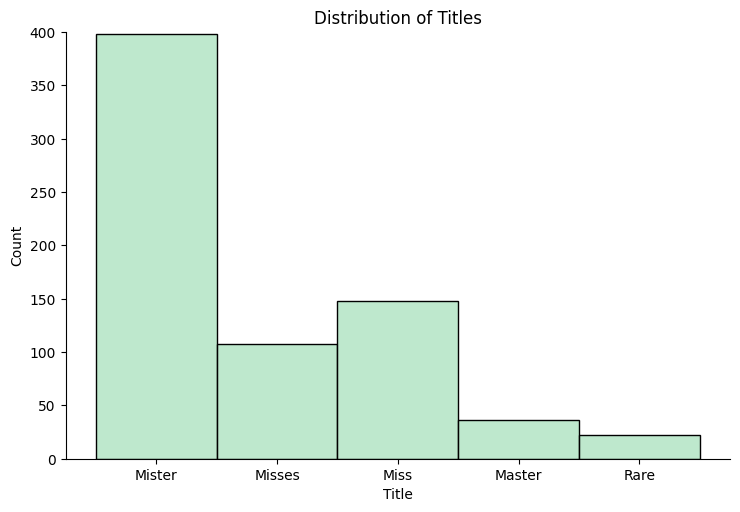

In [125]:
sns.displot(data=X_train,
            x="Title",
            kind="hist",
            color=mako(0.9),
            aspect=1.5,
            bins=[0.5, 1.5, 2.5, 3.5, 4.5])\
                .set(xticks=[0,1,2,3,4])\
                .set_axis_labels("Title", "Count")
plt.title("Distribution of Titles")
plt.ylim(0,400)

(0.0, 450.0)

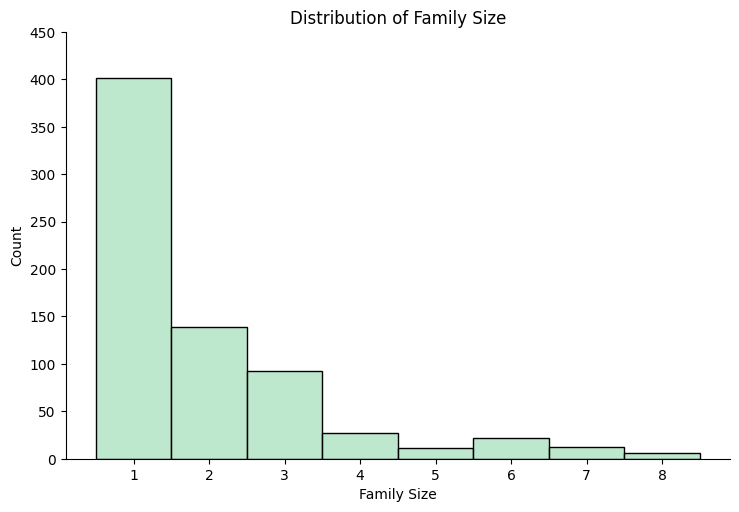

In [144]:
sns.displot(data=X_train,
            x="Family Size",
            kind="hist",
            color=mako(0.9),
            aspect=1.5,
            bins=[i+0.5 for i in range(0,9)])\
                .set(xticks=[i for i in range(1,9)])\
                .set_axis_labels("Family Size", "Count")
plt.title("Distribution of Family Size")
plt.ylim(0,450)

##### Multivariate Analysis